# Cats and Dogs classifier using CNNs

### Imports

In [19]:
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt


In [2]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()

In [3]:
import zipfile

file_name = "train.zip"
val_file_name = "test1.zip"
training_dir = 'dogs-vs-cats/training/'
validation_dir = 'dogs-vs-cats/validation/'


### Creating training and validation dirs

In [4]:
# zip_ref = zipfile.ZipFile(file_name, 'r')
# zip_ref.extractall(training_dir)
# zip_ref.close()

# zip_ref = zipfile.ZipFile(val_file_name, 'r')
# zip_ref.extractall(validation_dir)
# zip_ref.close()

### Using Image Datagenerator

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (256, 256),
    class_mode = 'binary',
    subset='training'
)

validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = train_datagen.flow_from_directory(
  training_dir,
  target_size=(256, 256),
  class_mode='binary',
  subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


### Model

In [6]:
model = Sequential([
    layers.Conv2D(
        32,
        kernel_size=(3, 3),
        padding='valid',
        activation='relu',
        input_shape=(256, 256, 3)
    ),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),

    layers.Conv2D(
        64,
        kernel_size=(3, 3),
        padding='valid',
        activation='relu'
    ),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),

    layers.Conv2D(
        128,
        kernel_size=(3, 3),
        padding='valid',
        activation='relu'
    ),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),

    layers.Flatten(),

    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.1),

    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.1),
    
    layers.Dense(1, activation = 'sigmoid')
])

2024-01-11 22:34:41.475122: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-11 22:34:41.542211: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-11 22:34:41.542472: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

### Compiling model

In [7]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)

### Callback function

In [8]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.85 and logs.get('val_accuracy')>=0.85):
      self.model.stop_training = True
callbacks = myCallback()

### Training

In [9]:
model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=[callbacks]
)

Epoch 1/15


2024-01-11 22:34:43.381800: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-11 22:34:46.628425: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f36e81ab3e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-11 22:34:46.628466: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-01-11 22:34:46.634332: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1704992686.751066   85113 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-01-11 22:34:48.480282: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.03GiB with freed_by_count=0. The caller indicates 

625/625 [==============================] - 97s 142ms/step - loss: 1.2668 - accuracy: 0.5758 - val_loss: 0.6613 - val_accuracy: 0.6338
Epoch 2/15
625/625 [==============================] - 88s 141ms/step - loss: 0.6427 - accuracy: 0.6431 - val_loss: 0.6457 - val_accuracy: 0.6136
Epoch 3/15
625/625 [==============================] - 88s 141ms/step - loss: 0.5781 - accuracy: 0.7026 - val_loss: 0.7841 - val_accuracy: 0.5810
Epoch 4/15
625/625 [==============================] - 88s 141ms/step - loss: 0.5106 - accuracy: 0.7495 - val_loss: 0.9768 - val_accuracy: 0.6084
Epoch 5/15
625/625 [==============================] - 87s 140ms/step - loss: 0.4548 - accuracy: 0.7818 - val_loss: 0.5462 - val_accuracy: 0.7210
Epoch 6/15
625/625 [==============================] - 88s 141ms/step - loss: 0.3902 - accuracy: 0.8147 - val_loss: 0.4781 - val_accuracy: 0.7456
Epoch 7/15
625/625 [==============================] - 88s 141ms/step - loss: 0.3293 - accuracy: 0.8453 - val_loss: 0.4821 - val_accuracy: 0.7

### Save the Model

In [10]:
model.save("cats_dogs_2.0")

INFO:tensorflow:Assets written to: cats_dogs_2.0/assets


INFO:tensorflow:Assets written to: cats_dogs_2.0/assets


### Testing

In [13]:
x_test=[]

test_path = "dogs-vs-cats/test1"
sub_path=test_path
count1=0
for img in os.listdir(sub_path):
    image_path=sub_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(256,256))
    x_test.append(img_arr)
    count1=count1+1
    if count1>=20:
        break

In [14]:
test_x=np.array(x_test)
test_x.shape

(20, 256, 256, 3)

In [31]:
y_pred = model.predict(test_x)
y_pred = np.round(y_pred).astype(int).ravel()

1/1 [==============================] - 0s 20ms/step


In [32]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [33]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

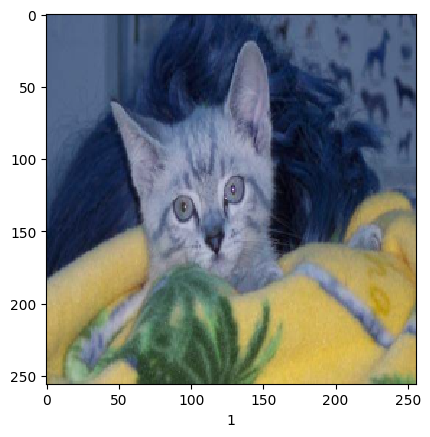

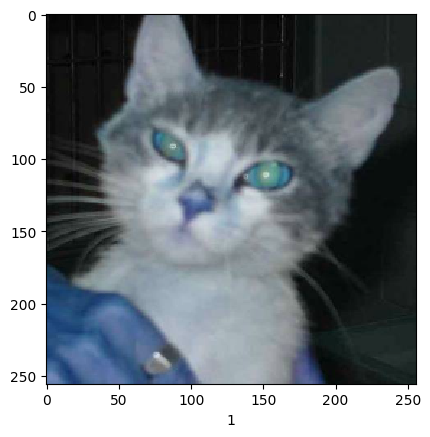

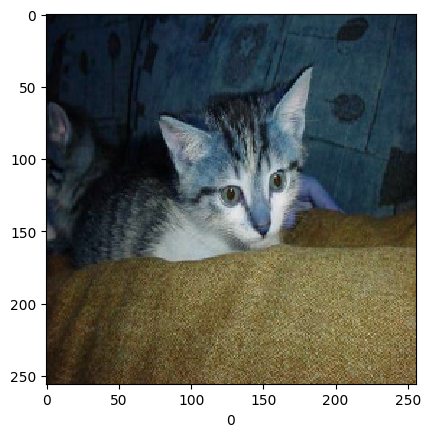

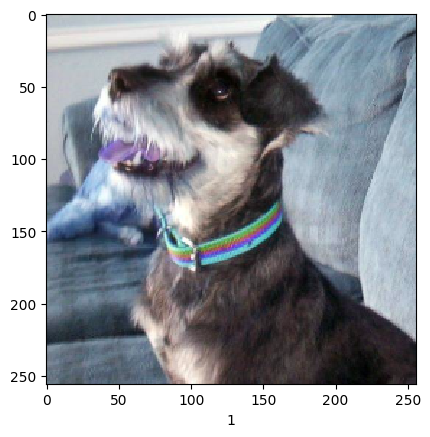

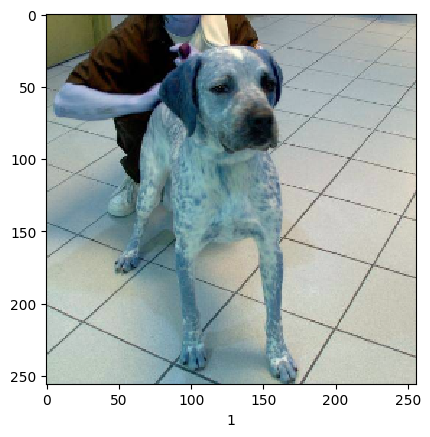

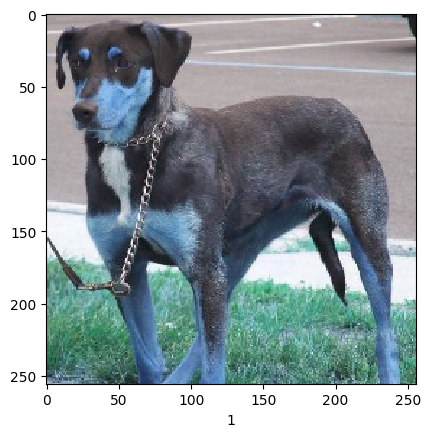

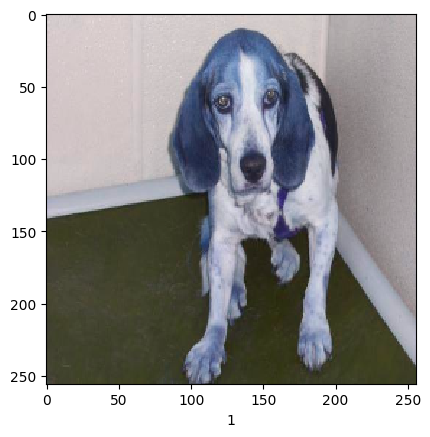

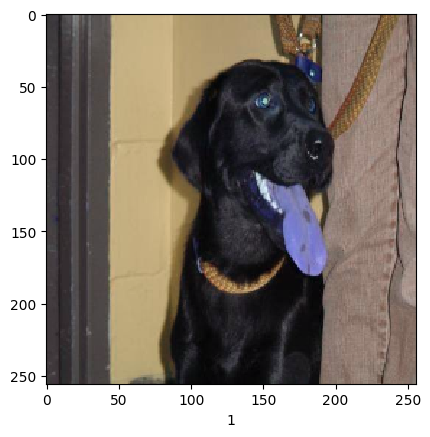

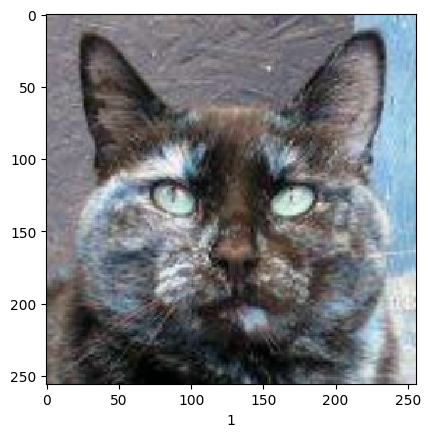

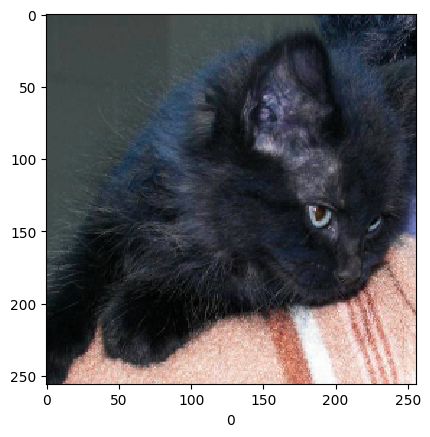

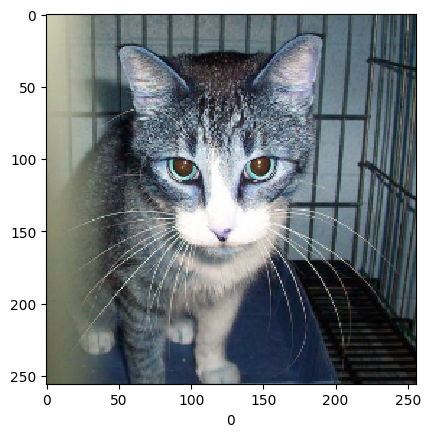

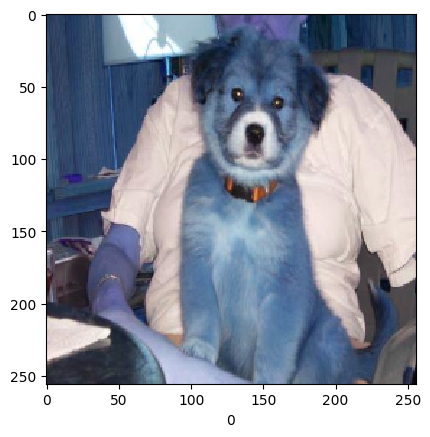

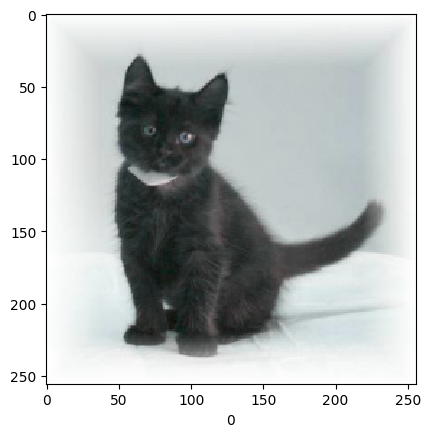

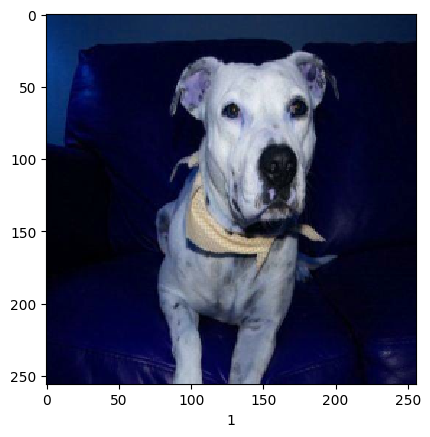

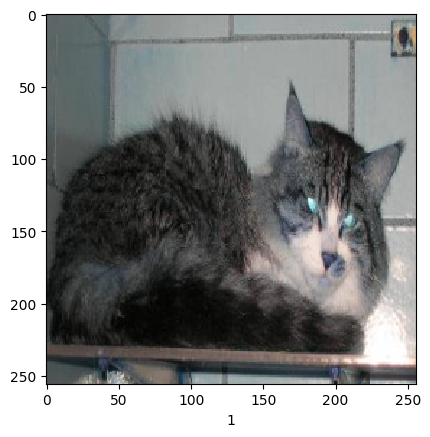

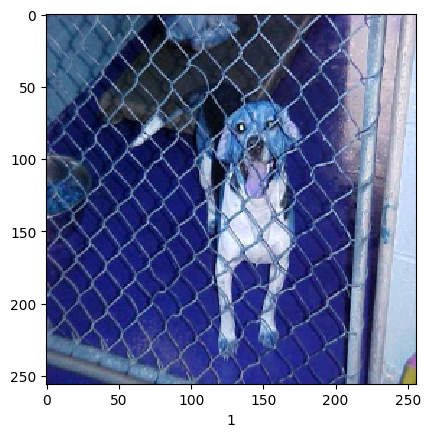

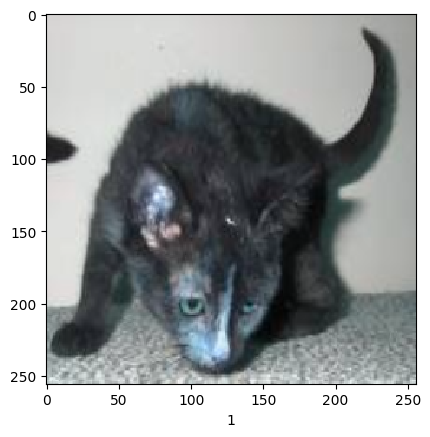

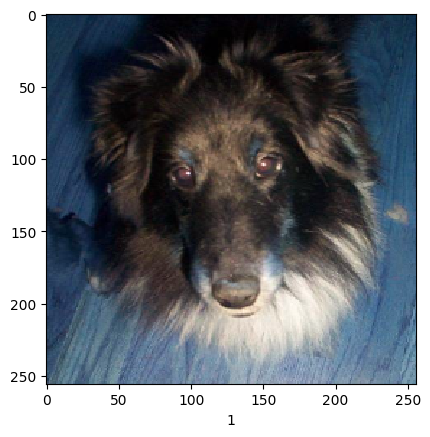

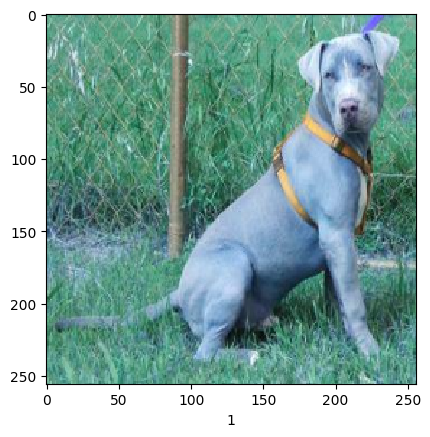

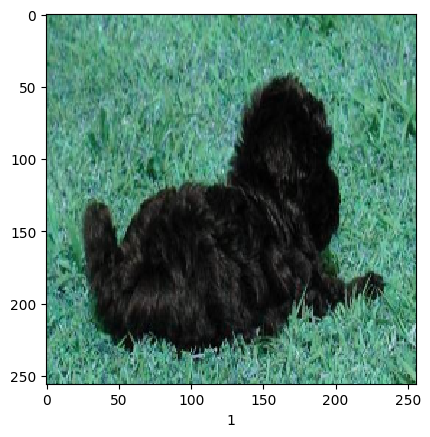

In [34]:
for i in range(0, 20):
    plt.imshow(test_x[i], interpolation='nearest')
    plt.xlabel(y_pred[i])
    plt.show()
    